In [1]:
# 18222757 Maciej Augustynek ,18244327 Bartlomiej Skorecki
# Code executes till the end without errors
# Original source : https://www.kaggle.com/esraamohamedahmed/classification-of-butterflies-images

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd
import os
from tensorflow.keras.metrics import Precision , Recall

In [3]:
import cv2
path='./images/'
file=os.listdir('./images/')
features=[] #to store images
labels=[] #to store labels
for img in file:
    # label=int(img) 
    label=int(img[:3]) #extracts label from the image file name
    labels.append(label) #adds the found label to the list of labels
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
    #Resizes images into the size 220x220
    img_array=cv2.resize(img_array,(220,220))
    #stores images in the array
    features.append(img_array)

In [4]:
import os
descrid_path='./descriptions'
descrid=os.listdir('./descriptions')
descrid

['001.txt',
 '002.txt',
 '003.txt',
 '004.txt',
 '005.txt',
 '006.txt',
 '007.txt',
 '008.txt',
 '009.txt',
 '010.txt']

In [5]:
#Creating a list of butterfly types
dict_1={'001': 'Danaus_plexippus', '002': 'Heliconius_charitonius', '003': 'Heliconius_erato', '004': 'Junonia_coenia', '005': 'Lycaena_phlaeas', '006': 'Nymphalis_antiopa', '007': 'Papilio_cresphontes', '008': 'Pieris_rapae', '009': 'Vanessa_atalanta', '0010': 'Vanessa_cardui'} 

In [6]:
print(set(labels))
list_labels=[]
#We add labels to a set for each image in the dataset. We will use this list later to assign the labels to the images.
for i in labels:
    new_label=dict_1['00'+str(i)]
    list_labels.append(new_label)
#Printed unique labels from the labels added
print(set(list_labels)) 

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
{'Vanessa_atalanta', 'Junonia_coenia', 'Pieris_rapae', 'Vanessa_cardui', 'Papilio_cresphontes', 'Danaus_plexippus', 'Nymphalis_antiopa', 'Lycaena_phlaeas', 'Heliconius_charitonius', 'Heliconius_erato'}


In [7]:
import numpy as np
#We change the 220x220 images into a numpy array to make it easier for them to work with the model
features=np.array(features)
#Normalising the images
features=features/255.0
features=features.reshape(-1,220,220,3)
print(features.shape)

(832, 220, 220, 3)


In [8]:
#OneHotEncoding:To deal with categorical values we need to preprocess it using onehot ecnoding
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
#One hot encoding coverts our labels so they can be processed by the ML model better to get a better prediction
le=LabelEncoder()
#Fits our labels into the LabelEncoder and returns the transformed data
y=le.fit_transform(list_labels)
from tensorflow.keras.utils import to_categorical
#Needs to be changed to to_categorical since we have more than 2 classes to be identified
y=to_categorical(y)

In [9]:
from sklearn.model_selection import train_test_split
#Splits our data into our training and test dataset. Our test data is 20% of the overall data and training data is 80%
x_train,x_test,y_train,y_test=train_test_split(features,y,random_state=11,test_size=0.2)

In [10]:
from tensorflow.keras.layers import (
    BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2,l1

#Building the model
model = Sequential() # Allows us to create multiple layers to use a CNN structure
model.add(Conv2D(32, (3,3), padding="same", activation = 'relu', kernel_regularizer=l2(0.0002) , input_shape=(220,220,3)))
model.add(MaxPooling2D((3,3)))
model.add(BatchNormalization())

model.add(Conv2D(32, (5, 5), activation='relu', kernel_regularizer=l1(0.0002))) 
model.add(MaxPooling2D((3,3)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.0002))) 
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.0002))) 
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu' , kernel_regularizer=l2(0.0002))) 
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
# Dropout layer used to help reduce overfitting
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))

# Output layer have 10 labels 
model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(optimizer='adam'
              ,metrics=['accuracy',Precision(), Recall()],loss='categorical_crossentropy')
history=model.fit(x_train,y_train,batch_size=12,epochs=50,validation_split=0.2)

Epoch 1/50
45/45 [==============================] - 10s 195ms/step - loss: 1.8896 - accuracy: 0.3872 - precision: 0.6231 - recall: 0.2331 - val_loss: 2.6752 - val_accuracy: 0.0977 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
45/45 [==============================] - 9s 190ms/step - loss: 1.1240 - accuracy: 0.6842 - precision: 0.8177 - recall: 0.5564 - val_loss: 3.0343 - val_accuracy: 0.0902 - val_precision: 0.8333 - val_recall: 0.0376
Epoch 3/50
45/45 [==============================] - 8s 188ms/step - loss: 0.7686 - accuracy: 0.8177 - precision: 0.9031 - recall: 0.7180 - val_loss: 3.4353 - val_accuracy: 0.2406 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/50
45/45 [==============================] - 8s 189ms/step - loss: 0.5904 - accuracy: 0.8853 - precision: 0.9260 - recall: 0.8233 - val_loss: 3.1981 - val_accuracy: 0.2406 - val_precision: 0.4800 - val_recall: 0.0902
Epoch 5/50
45/45 [==============================] - 8s 188ms/step - loss: 0.4586 - accu

45/45 [==============================] - 9s 208ms/step - loss: 0.1849 - accuracy: 0.9887 - precision: 0.9887 - recall: 0.9868 - val_loss: 0.4356 - val_accuracy: 0.9173 - val_precision: 0.9173 - val_recall: 0.9173
Epoch 38/50
45/45 [==============================] - 9s 208ms/step - loss: 0.2701 - accuracy: 0.9624 - precision: 0.9641 - recall: 0.9586 - val_loss: 0.6829 - val_accuracy: 0.8722 - val_precision: 0.9055 - val_recall: 0.8647
Epoch 39/50
45/45 [==============================] - 9s 209ms/step - loss: 0.2244 - accuracy: 0.9774 - precision: 0.9848 - recall: 0.9737 - val_loss: 0.6501 - val_accuracy: 0.8722 - val_precision: 0.8779 - val_recall: 0.8647
Epoch 40/50
45/45 [==============================] - 9s 206ms/step - loss: 0.2796 - accuracy: 0.9549 - precision: 0.9583 - recall: 0.9511 - val_loss: 0.5374 - val_accuracy: 0.9098 - val_precision: 0.9297 - val_recall: 0.8947
Epoch 41/50
45/45 [==============================] - 9s 193ms/step - loss: 0.2797 - accuracy: 0.9624 - precision

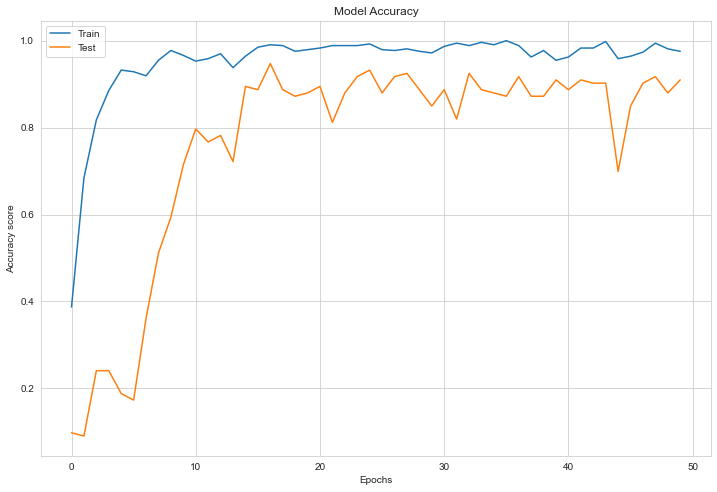

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy score')
plt.title('Model Accuracy')
plt.legend(['Train','Test'])
plt.show()

In [13]:
loss,accuracy,precision,recall=model.evaluate(x_test,y_test)

6/6 [==============================] - 1s 81ms/step - loss: 0.6925 - accuracy: 0.8683 - precision: 0.8889 - recall: 0.8623


In [14]:
import tensorflow
# This network has many hyper parameters that you have to adjust first
# The first hyperparameter gives you the freedom to choose whether to enter the final dense layer of the network or cancel it, in which case it has been cancelled.
mnet = tensorflow.keras.applications.mobilenet_v2.MobileNetV2(include_top=False, 
                                                      input_shape=(220, 220, 3),#same as of custom model
                                                      pooling='avg',
                                                      weights='imagenet')

mnet.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 220, 220, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 110, 110, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 110, 110, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 110, 110, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [15]:
model2=Sequential([
    mnet,
    Dropout(0.25),
    Dense(10,activation='softmax') # here we use 10 layers because we have to predict bewtween 10 classes
])

In [16]:
# here we freezed the layer that responsible for feature extraction
model2.layers[0].trainable = False
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1280)              2257984   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                12810     
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


In [17]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',Precision(), Recall()])
history2=model2.fit(x_train,y_train,batch_size=12, epochs=10,validation_split=0.3)

Epoch 1/10
39/39 [==============================] - 11s 257ms/step - loss: 1.8650 - accuracy: 0.3871 - precision_1: 0.7045 - recall_1: 0.1333 - val_loss: 0.8453 - val_accuracy: 0.8700 - val_precision_1: 0.9890 - val_recall_1: 0.4500
Epoch 2/10
39/39 [==============================] - 9s 237ms/step - loss: 0.6913 - accuracy: 0.8538 - precision_1: 0.9654 - recall_1: 0.6000 - val_loss: 0.4340 - val_accuracy: 0.9250 - val_precision_1: 0.9821 - val_recall_1: 0.8250
Epoch 3/10
39/39 [==============================] - 9s 241ms/step - loss: 0.3882 - accuracy: 0.9355 - precision_1: 0.9846 - recall_1: 0.8258 - val_loss: 0.3081 - val_accuracy: 0.9650 - val_precision_1: 0.9835 - val_recall_1: 0.8950
Epoch 4/10
39/39 [==============================] - 9s 236ms/step - loss: 0.2551 - accuracy: 0.9699 - precision_1: 0.9930 - recall_1: 0.9183 - val_loss: 0.2586 - val_accuracy: 0.9600 - val_precision_1: 0.9839 - val_recall_1: 0.9150
Epoch 5/10
39/39 [==============================] - 9s 237ms/step - los

6/6 [==============================] - 2s 350ms/step - loss: 0.1947 - accuracy: 0.9701 - precision_1: 0.9747 - recall_1: 0.9222


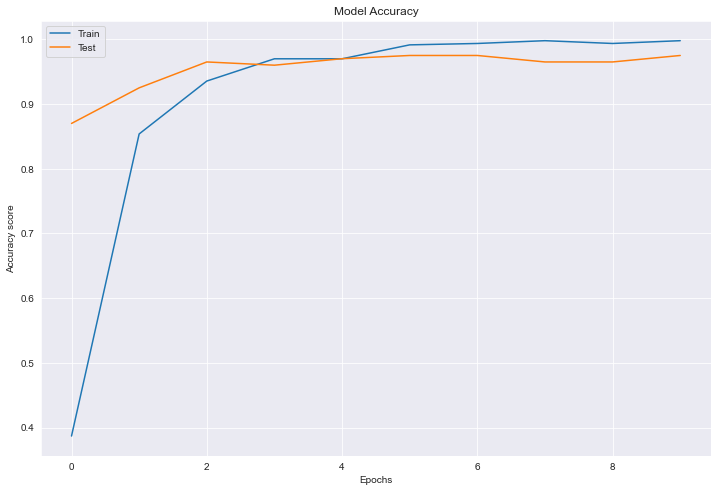

In [20]:
loss,accuracy,precision,recall=model2.evaluate(x_test,y_test)
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy score')
plt.title('Model Accuracy')
plt.legend(['Train','Test'])
plt.show()